# Title

## Imports

In [1]:
import itertools
import colorcet as cc
import random

import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from bokeh.io import output_file, show, output_notebook, save, curdoc
from bokeh.plotting import figure, from_networkx
from bokeh.models import Circle, MultiLine
from bokeh.transform import linear_cmap
from bokeh.palettes import Blues8, RdBu, cividis, OrRd, magma, plasma, viridis

from scripts.helpers import get_similarities_from_json

## Betweenness

In [101]:
G = nx.Graph()

# let's define edges
edges = [
    ('a', 'b'), ('a', 'c'), ('a', 'd'), ('c', 'd'), ('c', 'e'), ('b', 'e'),
    ('f', 'e'), ('f', 'h'), ('f', 'g'), ('g', 'h'), ('b', 'd'), ('i', 'g'),
    ('i', 'f'), ('h', 'e'), ('g', 'e')
]

for node_1, node_2 in edges:
    G.add_edge(node_1, node_2)

In [102]:
betweenness = nx.betweenness_centrality(G)
nx.set_node_attributes(G, name='betweenness', values=betweenness)

In [103]:
# add name as an attribute
names = dict((id_, id_) for id_ in G.nodes)
nx.set_node_attributes(G, name='name', values=names)

In [104]:
# some annoying bokeh thing
mapping = dict((n, i) for i, n in enumerate(G.nodes))
H = nx.relabel_nodes(G, mapping)

In [105]:
output_notebook()

HOVER_TOOLTIPS = [("Betweenness", "@betweenness{0.00}")]

plot = figure(
    sizing_mode='stretch_width',
    height=455,
    tools="pan, wheel_zoom, save, reset",
    active_scroll='wheel_zoom',
    toolbar_location=None,
    tooltips=HOVER_TOOLTIPS
)

plot.axis.visible = False
plot.grid.visible = False
plot.background_fill_color = "white"
plot.border_fill_color = "white"  # (255, 255, 255, 0)

network_graph = from_networkx(H, layout_function=nx.spring_layout, scale=10)
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=0.5)

# set node sizes and colors according to node betweenness (color as spectrum of color palette)
color_attribute = 'betweenness'
min_color = min(network_graph.node_renderer.data_source.data[color_attribute])
max_color = max(network_graph.node_renderer.data_source.data[color_attribute])
network_graph.node_renderer.glyph = Circle(
    size=40,
    fill_color=linear_cmap(color_attribute, cividis(256), min_color, max_color)
)

# set edge opacity and width


plot.renderers.append(network_graph)

# show(plot)

# output_file('betweenness.html', mode='inline')
# save(plot)

Loading BokehJS ...

## Degree

In [7]:
G_deg = nx.Graph()

# let's define edges
edges = [
    ('b', 'o'), ('f', 'u'),
    ('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('a', 'f'),
    ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'd'), ('c', 'e'),
    ('f', 'c'), ('f', 'd'), ('f', 'e'), ('g', 'b'), ('g', 'd'), ('g', 'f')
]

for node_1, node_2 in edges:
    G_deg.add_edge(node_1, node_2)

In [8]:
degree = nx.degree_centrality(G_deg)
nx.set_node_attributes(G_deg, name='degree', values=degree)

In [9]:
betweenness = nx.betweenness_centrality(G_deg)
nx.set_node_attributes(G_deg, name='betweenness', values=betweenness)

In [10]:
# add name as an attribute
names = dict((id_, id_) for id_ in G_deg.nodes)
nx.set_node_attributes(G_deg, name='name', values=names)

In [11]:
# some annoying bokeh thing
mapping = dict((n, i) for i, n in enumerate(G_deg.nodes))
H_deg = nx.relabel_nodes(G_deg, mapping)

In [12]:
output_notebook()

HOVER_TOOLTIPS = [("degree", "@degree{0.00}"), ("betweenness", "@betweenness{0.00}")]

plot = figure(
    sizing_mode='stretch_width',
    height=455,
    tools="pan, wheel_zoom, save, reset",
    active_scroll='wheel_zoom',
    toolbar_location=None,
    tooltips=HOVER_TOOLTIPS
)

plot.axis.visible = False
plot.grid.visible = False
plot.background_fill_color = "white"
plot.border_fill_color = "white"

network_graph = from_networkx(H_deg, layout_function=nx.spring_layout, scale=10)
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=0.5)

# set node sizes and colors according to node betweenness (color as spectrum of color palette)
color_attribute = 'degree'
min_color = min(network_graph.node_renderer.data_source.data[color_attribute])
max_color = max(network_graph.node_renderer.data_source.data[color_attribute])
network_graph.node_renderer.glyph = Circle(
    size=40,
    fill_color=linear_cmap(color_attribute, cividis(256), min_color, max_color)
)

# set edge opacity and width


plot.renderers.append(network_graph)

show(plot)

# output_file('degree.html', mode='inline')
# save(plot)

Loading BokehJS ...

## Similarity Matrix

In [2]:
df = pd.read_csv('../../data/processed/preprocessed.csv', index_col=0)
df.set_index('wikipedia_id', inplace=True)
print(df.shape)
df.head(5)

(22394, 9)


,name,release_year,rating,num_votes,plot,freebase_id,languages,countries,genres
wikipedia_id,,,,,,,,,
10109752,Miss Jerry,1894.0,5.3,207,After finding out that her father is suffering...,/m/02q23xk,['Silent film'],['United States of America'],"['Short Film', 'Silent film', 'Indie', 'Black-..."
28703057,The Corbett-Fitzsimmons Fight,1897.0,5.3,484,The film no longer exists in its entirety; how...,/m/0czdh_n,[],[],['Sports']
142995,The Story of the Kelly Gang,1906.0,6.0,855,The Story of the Kelly Gangs tone is of sorrow...,/m/0120y4,['English Language'],['Australia'],"['Crime Fiction', 'Silent film', 'Biography', ..."
32986669,Robbery Under Arms,1907.0,4.3,25,Key scenes of the film included the branding o...,/m/04p7yxx,['Silent film'],['Australia'],"['Silent film', 'Drama']"
32987200,"Captain Midnight, the Bush King",1911.0,5.4,18,Edgar Dalimore is the son of wealthy station o...,/m/0h569x9,['Silent film'],[],['Silent film']


In [14]:
similarity_dict = get_similarities_from_json(2010)
movies = list(set(itertools.chain(*similarity_dict.keys())))

subsample_movies = random.sample(movies, 20)
subsample_combinations = list(itertools.combinations(subsample_movies, 2))

similarity_df = pd.DataFrame(columns=['movie_1', 'movie_2', 'similarity'], dtype=float)

for id_1, id_2 in subsample_combinations:

    if id_1 == id_2:
        similarity_df.loc[len(similarity_df)] = [df.loc[id_1]['name'], df.loc[id_2]['name'], 100]
        continue

    try:
        similarity = similarity_dict[(id_1, id_2)]
    except KeyError:
        similarity = similarity_dict[(id_2, id_1)]

    similarity_df.loc[len(similarity_df)] = [df.loc[id_1]['name'], df.loc[id_2]['name'], similarity * 100]

In [15]:
similarity_df

,movie_1,movie_2,similarity
0,An Inconvenient Tax,Aha Naa Pellanta,71.103093
1,An Inconvenient Tax,Noy,71.731201
2,An Inconvenient Tax,Kadaksham,71.083490
3,An Inconvenient Tax,Quarantine 2: Terminal,70.391632
4,An Inconvenient Tax,Life Express,71.594582
...,...,...,...
185,Brake,Antiviral,77.981437
186,Brake,Grandmaster,73.999715
187,Kick-Ass,Antiviral,73.899170
188,Kick-Ass,Grandmaster,73.382333


In [16]:
from math import pi

import pandas as pd

from bokeh.models import BasicTicker, PrintfTickFormatter
from bokeh.plotting import figure, show
from bokeh.transform import linear_cmap

output_notebook()

movies = similarity_df.movie_1.unique().tolist()

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

plot = figure(
    x_range=movies,
    y_range=movies[::-1],
    x_axis_location="above",
    sizing_mode='stretch_width',
    aspect_ratio=1,
    tooltips=[('movies', '@movie_1 @ @movie_2'), ('similarity', '@similarity{0.00}')],
    toolbar_location=None
)

plot.grid.grid_line_color = None
plot.axis.axis_line_color = None
plot.axis.major_tick_line_color = None
plot.axis.major_label_text_font_size = "12px"
plot.axis.major_label_standoff = 0
plot.xaxis.major_label_orientation = pi / 3

plot.yaxis.major_label_text_color = "black"
plot.xaxis.major_label_text_color = "black"

plot.background_fill_color = "white"
plot.border_fill_color = "white"

r = plot.rect(x="movie_1", y="movie_2", width=1, height=1, source=similarity_df,
              fill_color=linear_cmap("similarity", cividis(256), low=similarity_df.similarity.min(),
                                     high=similarity_df.similarity.max()),
              line_color=None)

_ = plot.rect(x="movie_2", y="movie_1", width=1, height=1, source=similarity_df,
              fill_color=linear_cmap("similarity", cividis(256), low=similarity_df.similarity.min(),
                                     high=similarity_df.similarity.max()),
              line_color=None)

plot.add_layout(r.construct_color_bar(
    major_label_text_font_size="12px",
    ticker=BasicTicker(desired_num_ticks=10),
    formatter=PrintfTickFormatter(format="%d%%"),
    label_standoff=12,
    background_fill_alpha=0,
    major_label_text_color="black",
    border_line_color=None,
    padding=10,
), 'right')

show(plot)

# output_file('similarity_matrix.html', mode='inline')
# save(plot)

Loading BokehJS ...

## Distribution

In [43]:
from numpy import linspace
from scipy.stats import gaussian_kde

from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure, show
from bokeh.sampledata.perceptions import probly

output_notebook()


def ridge(category, data, scale=20):
    return list(zip([category] * len(data), scale * data))


decades = [str(decade) for decade in range(1910, 1960, 10)]
palette = [cc.rainbow[i * 15] for i in range(len(decades))]

x = linspace(60, 90, 500)
source = ColumnDataSource(data=dict(x=x))

p = figure(
    y_range=decades,
    width=900,
    x_range=(65, 85),
    # toolbar_location=None
)

for i, decade in enumerate(reversed(decades)):
    print(decade)
    similarities = get_similarities_from_json(int(decade))
    similarities.update((key, value * 100) for key, value in similarities.items())
    pdf = gaussian_kde(list(similarities.values()))

    pdf_x = pdf(x) / 5

    y = ridge(decade, pdf_x)
    source.add(y, decade)
    p.patch('x', decade, color=palette[i], alpha=0.6, line_color="black", source=source)

p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis.ticker

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.y_range.range_padding = 0.12

show(p)

Loading BokehJS ...

1950
1940
1930
1920
1910


## Movie Distribution

In [91]:
rng = np.random.default_rng()
x = rng.normal(loc=0, scale=1, size=1000)

p = figure(
    sizing_mode='stretch_width',
    tooltips=[('frequency', '@top'), ('year', '@right')],
    height=450,
    toolbar_location=None
)

curdoc().theme = 'light_minimal'

count_series = df.groupby('release_year').name.count().rename('count')

bins = count_series.index.to_series().reset_index(drop=True)
frequency = count_series.reset_index(drop=True)

p.quad(
    top=frequency, bottom=0, left=bins[:-1], right=bins[1:],
    fill_color=cividis(1)[0], line_color="white"
)

p.xaxis.axis_label_text_font_size = "100pt"

# Probability density function
# pdf = np.exp(-0.5*x**2) / np.sqrt(2.0*np.pi)
# p.line(x, pdf, line_width=2, line_color="navy", legend_label="Probability Density Function")

p.y_range.start = 0
p.yaxis.axis_label = "Frequency"

# show(p)

output_file('year_histogram.html', mode='inline')
save(p)

'/Users/jan.kokla/Documents/EPFL/ada-2023-project-adaroundtheworld2023/notebooks/helper_notebooks/year_histogram.html'

In [84]:
cividis(1)[0]

'#00204C'

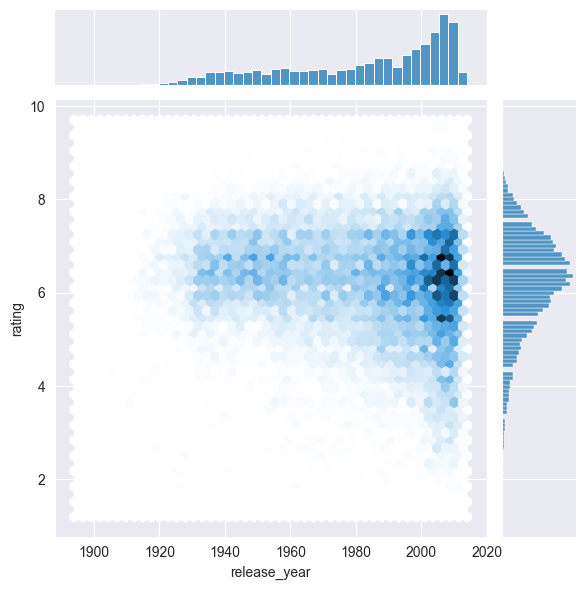

In [3]:
sns.jointplot(data=df, x='release_year', y='rating', kind='hex')

In [84]:
import plotly.express as px

fig = px.density_heatmap(
    df, x="release_year", y="rating", marginal_x="histogram", marginal_y="violin", nbinsx=len(df.release_year.unique())
)

fig.update_layout(
    template='presentation'
)

fig.show()
# fig.write_html("jointplot.html", config={'displayModeBar': False})

In [75]:
import numpy as np

from bokeh.models import HoverTool, HexTile, ColumnDataSource
from bokeh.plotting import figure, show

output_notebook()

p = figure(match_aspect=True, tools="wheel_zoom,reset", background_fill_color='#440154', y_range=(0, 10), x_range=(1900, 2020))
p.grid.visible = False

x = df.release_year
y = df.rating

r, bins = p.hexbin(df.release_year, df.rating, size=0.2, hover_color="pink", hover_alpha=0.8, aspect_scale=1/15)

p.circle(df.release_year, df.rating, color="white", size=0.5)

p.add_tools(HoverTool(
    tooltips=[("count", "@c"), ("(year, rating)", "(@q, @r)")],
    mode="mouse", point_policy="follow_mouse", renderers=[r],
))

show(p)

Loading BokehJS ...

In [80]:
source = ColumnDataSource(df)
p = figure(width=800, height=800, match_aspect=True, tools="wheel_zoom,reset,pan", background_fill_color='#440154')
p.grid.visible = False
p.hexbin('release_year', 'rating', size=0.1, source=source, fill_color='#440154')

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ("ipc_class", "@ipc_class")
]
show(p)

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [62]:
import numpy as np

from bokeh.models import HoverTool
from bokeh.plotting import figure, show

n = 500
x = 2 + 2*np.random.standard_normal(n)
y = 2 + 2*np.random.standard_normal(n)

p = figure(title="Hexbin for 500 points", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154')
p.grid.visible = False

r, bins = p.hexbin(x, y, size=0.5, hover_color="pink", hover_alpha=0.8)

p.circle(x, y, color="white", size=1)

p.add_tools(HoverTool(
    tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
    mode="mouse", point_policy="follow_mouse", renderers=[r],
))

show(p)

In [26]:
x

array([ 0.75414008,  3.53703443,  0.41219827,  1.83534625, -0.65533807,
        0.19040975,  1.79261626,  1.56093092,  3.57317705,  4.05818575,
        3.5384332 ,  4.3212718 ,  1.3836273 , -4.58337151,  0.47103045,
        2.92166735,  5.89612021, -0.26076563,  1.26078768,  3.82506405,
        0.82257703,  4.79026936,  1.62135681, -0.27746283,  2.84796081,
        3.93701149,  2.80451825, -0.47764096,  1.48518197,  3.87892419,
        2.71128238, -2.794277  , -0.47010225,  4.73249746,  2.32886833,
        1.39930832,  1.82567429,  3.99640255,  4.61465918,  0.49670183,
        1.78465608, -0.31338231,  3.59240594,  2.85615557,  2.9865344 ,
        4.60764456, -1.1059447 ,  1.87524659, -1.49670846,  2.57664341,
        0.13825043,  2.44478244,  0.4203167 ,  1.30413241, -0.14918025,
        0.16296918,  1.57011122,  6.56720199,  0.16491884,  1.47805333,
        0.38768222,  1.72218122,  2.13187239,  2.34368277, -2.4903856 ,
        4.71262341,  0.74303712,  0.39745616, -0.19489493,  1.37

In [99]:
from bokeh.models import TabPanel, Tabs
from bokeh.plotting import figure, show

p1 = figure(width=300, height=300)
p1.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="navy", alpha=0.5)
tab1 = TabPanel(child=p1, title="circle")

p2 = figure(width=300, height=300)
p2.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=3, color="navy", alpha=0.5)
tab2 = TabPanel(child=p2, title="line")

show(Tabs(tabs=[tab1, tab2]))

In [108]:
import networkx as nx
from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, TapTool, OpenURL, HoverTool, CustomJS, Slider, Column
from bokeh.plotting import from_networkx
import pandas as pd

data = {'source': ['A', 'A', 'A', 'A', 'A', 'A'], 'target': ['C', 'D', 'E', 'F', 'G', 'H'], 'source_count': [15, 15, 15, 25, 25, 25], 'target_count': [10, 20, 30, 10, 20, 30]}
df = pd.DataFrame(data)
net_graph = nx.from_pandas_edgelist(df, 'source', 'target')

for index, row in df.iterrows():
    net_graph.nodes[row['source']]['yearly_count'] = row['source_count']
    net_graph.nodes[row['target']]['yearly_count'] = row['target_count']

graph_plot = Plot(width = 800, height = 600, x_range = Range1d(-1.1, 1.1), y_range = Range1d(-1.1, 1.1))

node_hover_tool = HoverTool(tooltips = [("Name", "@index"), ("Yearly Count", "@yearly_count")])
graph_plot.add_tools(node_hover_tool)

graph_setup = from_networkx(net_graph, nx.spring_layout, scale = 1, center = (0, 0))
graph_setup.node_renderer.glyph = Circle(size = 20, fill_color = 'blue')
graph_setup.edge_renderer.glyph = MultiLine(line_color = "red", line_alpha = 0.8, line_width = 1)

graph_plot.renderers.append(graph_setup)

code = """ 
    var new_start = start.slice();
    var new_end = end.slice();
    new_index = end.slice();

    new_start = new_start.splice(0, cb_obj.value)
    new_end = new_end.splice(0, cb_obj.value)
    new_index = ['A'].concat(new_end)

    new_data_edge = {'start': new_start, 'end': new_end};
    new_data_nodes = {'index': new_index};
    graph_setup.edge_renderer.data_source.data = new_data_edge; 
    graph_setup.node_renderer.data_source.data = new_data_nodes; 
"""
callback = CustomJS(args = dict(graph_setup = graph_setup,
                                start = df['source'].values,
                                end = df['target'].values), code = code)
slider = Slider(title = 'Slider', start = 1, end = 6, value = 6)
slider.js_on_change('value', callback)

layout = Column(graph_plot, slider)
show(layout)

ValueError: failed to validate StaticLayoutProvider(id='p4390', ...).graph_layout: expected a dict of type Dict(Int, Seq(Any)), got a dict with invalid keys: A, C, D, E, F, G, H